In [20]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
from tensorflow.contrib.tensorboard.plugins import projector
import time

In [38]:
mnist = input_data.read_data_sets("MINIST_data",one_hot=True)

#执行次数
max_steps = 1001
#图片数量
image_num = 3000

sess = tf.Session()

#载入图片
embedding = tf.Variable(tf.stack(mnist.test.images[:image_num]),trainable=False,name='embedding')

batch_size = 50

n_batch = mnist.train.num_examples // batch_size

#参赛概要
def variable_summary(var):
    mean = tf.reduce_mean(var)
    tf.summary.scalar('mean',mean)
    with tf.name_scope('stddev'):
        stddev = tf.sqrt(tf.reduce_mean(tf.square(var - mean)))
    tf.summary.scalar('stddev',stddev)
    tf.summary.scalar('max',tf.reduce_max(var))
    tf.summary.scalar('min',tf.reduce_min(var))
    tf.summary.histogram('histogram',var)


#命名空间
#placeholder
with tf.name_scope("input"):
    x = tf.placeholder(tf.float32,[None,784],name = "x-input")
    y = tf.placeholder(tf.float32,[None,10],name = "y-input")

    
#显示图片
with tf.name_scope('input_reshape'):
    #reshape  -1不确定
    image_shaped_input = tf.reshape(x,[-1,28,28,1])
    tf.summary.image('input',image_shaped_input,10)
    
    
#创建简单神经网络
with tf.name_scope("layer"):
    with tf.name_scope("weight"):  
        w = tf.Variable(tf.zeros([784,10]),name='w')
        variable_summary(w)
    with tf.name_scope("biases"):
        b = tf.Variable(tf.zeros([10])+0.01,name='b')
        variable_summary(b)
    with tf.name_scope("softmax"):
        
        prediction = tf.nn.softmax(tf.matmul(x,w)+b)

#二次代价函数
#loss = tf.reduce_mean(tf.square(y - prediction))
#交叉熵
with tf.name_scope("loss"):
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels = y,logits = prediction))
    tf.summary.scalar('loss',loss)

#优化器
with tf.name_scope("train"):
    
    #train_step = tf.train.GradientDescentOptimizer(0.2).minimize(loss)
    train_step = tf.train.AdamOptimizer(1e-3).minimize(loss)
    #train_step = tf.train.AdadeltaOptimizer(0.02).minimize(loss)

init = tf.global_variables_initializer()

with tf.name_scope("accuracy"):
    with tf.name_scope("correct_prediction"):
        correct_prediction = tf.equal(tf.argmax(y,1),tf.argmax(prediction,1))
    with tf.name_scope("correct_prediction"):
        accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
        tf.summary.scalar('accuracy',accuracy)

metafile = './projector/projector/metadata.tsv'

#生成metadata文件
if tf.gfile.Exists(metafile):
    tf.gfile.DeleteRecursively('./projector/projector')

with open(metafile,'w') as f:
    labels = sess.run(tf.argmax(mnist.test.labels[:],1))
    for i in range(image_num):
        f.write(str(labels[i]) + '\n')

        
        
#合并所有的summary
merged = tf.summary.merge_all()

projector_writer = tf.summary.FileWriter('./projector/projector',sess.graph)
saver = tf.train.Saver()
config = projector.ProjectorConfig()
embed = config.embeddings.add()
embed.metadata_path = metafile
embed.sprite.image_path = './projector/data/mnist_10k_sprite.png'
embed.sprite.single_image_dim_extend([28,28])
#embed.sprite.single_image_dim_extend([28,28])
projector.visualize_embeddings(projector_writer.config)

        
s = time.time()

for i in range(max_steps):
    sess.run(init)
    batch_xs,batch_ys = mnist.train.next_batch(100)
    run_option = tf.RunOptions(trace_level = tf.RunOptions.FULL_TRACE)
    run_matadata = tf.RunMetadata()
    summary,_ = sess.run([merged,train_step],feed_dict = {x:batch_xs,y:batch_ys},options=run_option,run_metadata=run_matadata)
    projector_writer.add_run_metadata(run_metadata,'step{0:3d}'.format(i))
    projector_writer.add_summary(summary,i)
    
    if i%100 == 0:
    
        acc = sess.run(accuracy,feed_dict = {x:mnist.test.images,y:mnist.test.labels})
        
        print("Iter " + str(epoch) + ",Testing accuracy " + str(acc))
saver.save(sess,'./projector/projector/a_model.ckpt',global_step=max_steps)
projector_writer.close()
sess.close()
print(time.time() - s)

Extracting MINIST_data/train-images-idx3-ubyte.gz
Extracting MINIST_data/train-labels-idx1-ubyte.gz
Extracting MINIST_data/t10k-images-idx3-ubyte.gz
Extracting MINIST_data/t10k-labels-idx1-ubyte.gz


FileNotFoundError: [Errno 2] No such file or directory: './projector/projector/metadata.tsv'

Extracting MINIST_data/train-images-idx3-ubyte.gz
Extracting MINIST_data/train-labels-idx1-ubyte.gz
Extracting MINIST_data/t10k-images-idx3-ubyte.gz
Extracting MINIST_data/t10k-labels-idx1-ubyte.gz


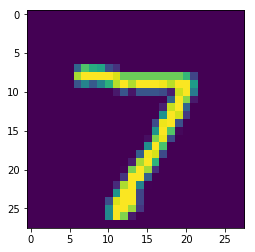

(2, 784)

In [15]:
mnist = input_data.read_data_sets("MINIST_data",one_hot=True)
a = mnist.test.images[:1].reshape(28,28)
import matplotlib.pyplot as plt
plt.imshow(a)
plt.show()

sess = tf.Session()
b = sess.run(tf.stack(mnist.test.images[:2]))
b.shape

In [19]:
mnist.test.labels[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [23]:
'step{:3d}'.format(3)

'step  3'

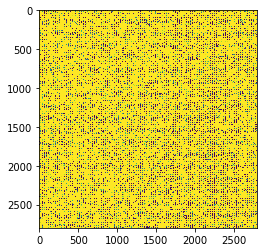

In [28]:
a = mnist.test.images
import numpy as np
n = np.zeros((2800,2800),dtype='uint8')
index = 0
for i in range(100):
    for j in range(100):
        n[j*28:(j+1)*28,i*28:(i+1)*28] = 255 - a[index].reshape(28,28)*255
        index +=1

plt.imshow(n)
plt.show()
from PIL import Image
img = Image.fromarray(n)
img.save('test.png')

In [ ]:
config = projector.ProjectorConfig()
embed = confi